In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Question 1

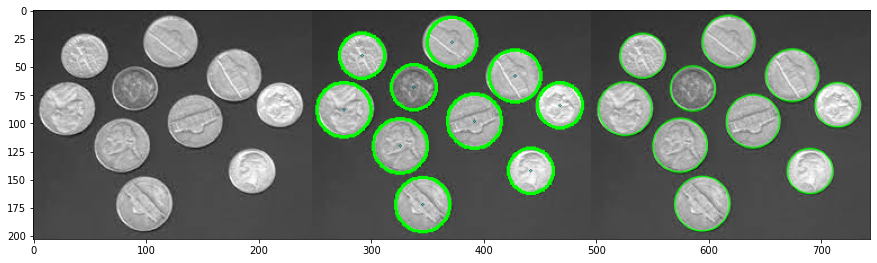

In [2]:
img = cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)
rows = gray.shape[0]

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8, param1 = 50, param2 = 25, minRadius=10, maxRadius=30)
img_hough = img.copy()

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img_hough, center, 1, (0, 100, 100), 1)
        # circle outline
        radius = i[2]
        cv.circle(img_hough, center, radius, (0, 255, 0), 2)
        
    
img_blob = img.copy()
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 255


# Filter by Area
params.filterByArea = True

# Filter by Circularity
params.filterByCircularity = True

# Filter by Convexity
params.filterByConvexity = False

# Filter by Inertia
params.filterByInertia = False

params.blobColor = 255
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# Draw detected blobs as circles
blank = np.zeros((1,1))
img_blob = cv.drawKeypoints(img_blob, keypoints, blank, (0, 255, 0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# img_blob = np.stack((img_blob,)*3, axis=-1)
combine = np.concatenate((img, img_hough, img_blob), axis = 1)
plt.figure(figsize = (15, 15))
plt.imshow(combine)

### Comments:
- circular objects detection have thicker edges and blob detection algorithm thinner edges
- blob detection algorithm is more accuracy than circular objects detection

## Question 2

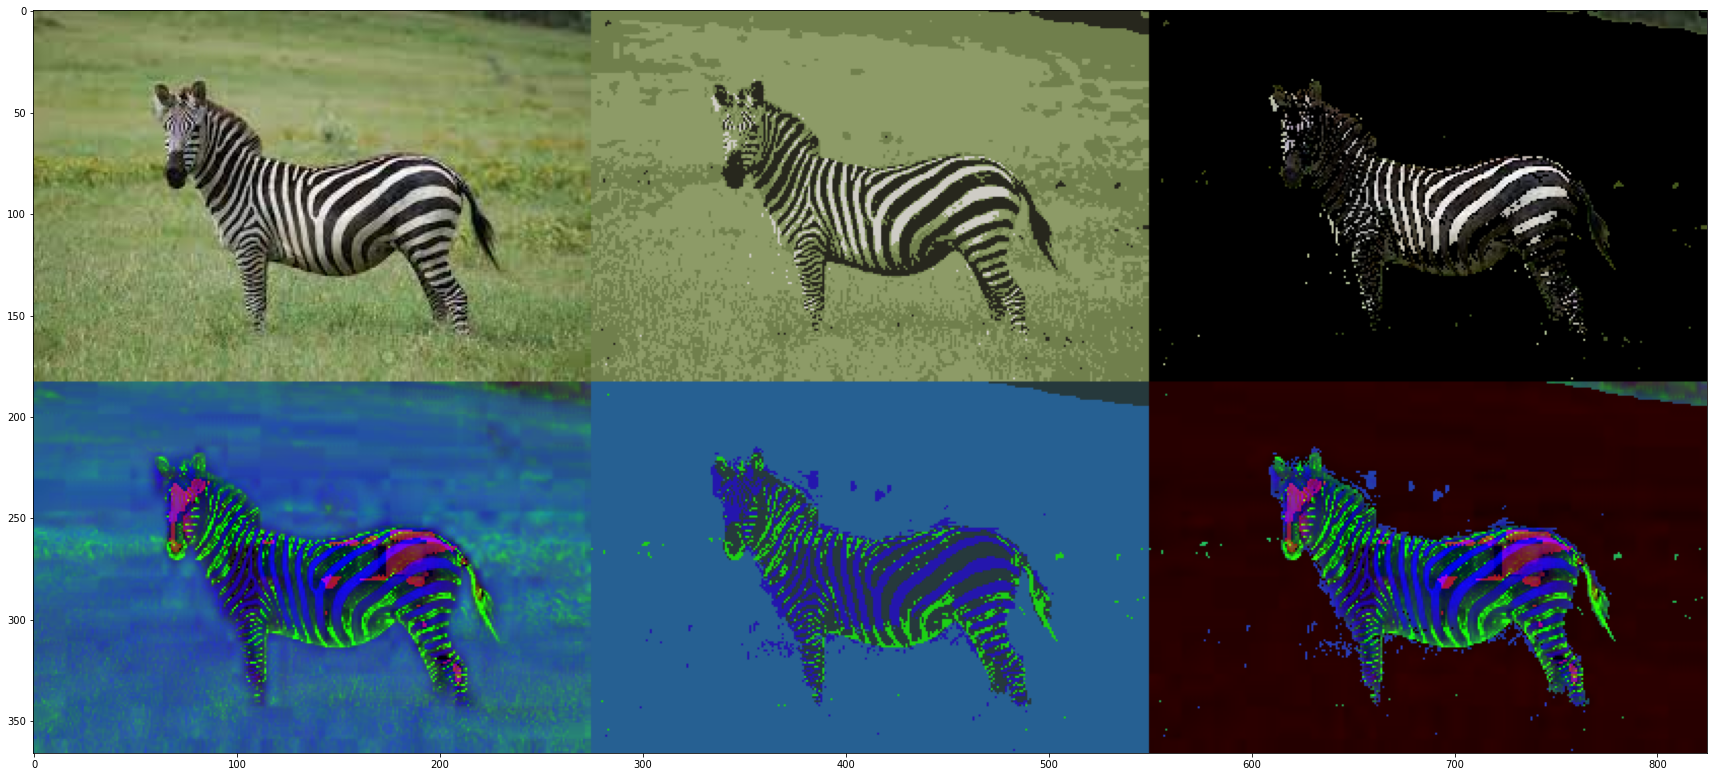

In [3]:
img_rgb = cv.imread('zebra.jfif')
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_BGR2HSV)

img_reshape_rgb = np.float32(img_rgb.reshape((-1, 3)))
img_reshape_hsv = np.float32(img_hsv.reshape((-1, 3)))

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 20

ret, label, center = cv.kmeans(img_reshape_rgb, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image_rgb = res.reshape((img_rgb.shape))
unique, counts = np.unique(label, return_counts=True)
colours = center[np.argpartition(counts, 2)[:2]]
segment_image_rgb =  np.isin(result_image_rgb, (colours))
segmented_rgb = img_rgb.copy()
segmented_rgb[segment_image_rgb == False] = 0

ret, label, center = cv.kmeans(img_reshape_hsv, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image_hsv = res.reshape((img_hsv.shape))
unique, counts = np.unique(label, return_counts=True)
colours = center[np.argpartition(counts, 3)[:3]]
segment_image_hsv =  np.isin(result_image_hsv, (colours))
segmented_hsv = img_hsv.copy()
segmented_hsv[segment_image_hsv == False] = 0

row1 = cv.cvtColor(np.concatenate((img_rgb, result_image_rgb, segmented_rgb), axis = 1), cv.COLOR_BGR2RGB)
row2 = np.concatenate((img_hsv, result_image_hsv, segmented_hsv), axis = 1)
result = np.concatenate((row1, row2))

plt.figure(figsize = (30, 30))
plt.imshow(result)